

Portfolio: 证券组合, a set of allocations in a variety of securities. The percentages should add up to 100%.

### **Key Statistics for a Profolio:**

- daily returns

- overall cumulative returns: the amount returned after an entire time period(NOT DAILY).

- avg. daily return

- std. daily return: volatility不稳定性 of that actual return.

### **Sharpe Ratio夏普比率:**

https://www.investopedia.com/terms/s/sharperatio.asp

风险调整后的收益率就是一个可以同时对收益与风险加以考虑的综合指标，长期能够排除风险因素对绩效评估的不利影响。夏普比率就是一个可以同时对收益与风险加以综合考虑的三大经典指标之一。

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

example:

甲投资：超额（超出国债）回报期望10%，标准差20%，夏普比率为0.5

乙投资：超额回报期望5%，标准差5%，夏普比率为1

乍一看，甲投资回报期望高，似乎是比较好的机会。其实乙投资更胜一筹，因为它的夏普比率高，意味着投资者用1个单位的“风险”能换取更多的回报期望。

夏普比率多大才算好呢？

greater than one is considered acceptable to good by investors. This usually depends on what kind of risk tolerance is. But commonly speaking, a ratio higher than 2 is usually rated as very good. And their ratio of 3 or higher is considered to be excellent.

#### **Formula**

Sharpe ratio = (Mean portfolio return − Risk-free return)/Standard deviation of portfolio return.

- Mean portfolio return: expected profolio return

- Risk-free: the return you would receive if you put your money in an investment like bank savings account. 但这个利息一般接近0，因此这个值一般处理是approximate as 0.（也有1%多的那就可以这个值设为1）

- Standard deviation of portfolio return: volatility.

因此，可以将此近似为：

SR = Mean Return / std. deviation

#### **Change the sampling rates**

Keep in mind the Sharpe ratio was actually originally thought of as a yearly metric. The annulized Sharpe Ratio can be obtained by multiplying against a K-factor based off your Sampling rate:

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)  # 一年大概252个工作日
* Weekly = sqrt(52)
* Monthly = sqrt(12)




In [1]:
!pip install quandl  # used to get the stoke data

In [2]:
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web

## Create a Portfolio

In [3]:
# 用quandl也可 但是要获取最新的数据需要氪金，否则只有2018年3月27号之前的数据
# import quandl
# quandl.ApiConfig.api_key = "tLn5x41V8QtEcx7FuzSH"
# aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)  # .11是只获取数据的第十一列

start = datetime.datetime(2017, 1, 1)
end = datetime.date.today()

aapl = pd.DataFrame(web.DataReader("AAPL", 'yahoo', start, end)['Adj Close'])    # df['Adj Close']是Series
cisco = pd.DataFrame(web.DataReader('CSCO', 'yahoo', start, end)['Adj Close'])
ibm = pd.DataFrame(web.DataReader('IBM', 'yahoo', start, end)['Adj Close'])
amzn = pd.DataFrame(web.DataReader('AMZN', 'yahoo', start, end)['Adj Close'])

## Normalize Prices

This is the same as cumulative daily returns

In [4]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']  # cumulative daily return rate只需要全员除以第一行数据，如果是daily return rate就是除以每一列各自前一列数据

In [5]:
aapl.tail()

,Adj Close,Normed Return
Date,,
2021-01-20,132.029999,4.800921
2021-01-21,136.869995,4.976915
2021-01-22,139.070007,5.056912
2021-01-25,142.919998,5.196907
2021-01-26,142.920807,5.196936


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [6]:
# 各自乘上各自的份额，再乘投资总额
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):  
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [7]:
aapl.tail()

,Adj Close,Normed Return,Allocation
Date,,,
2021-01-20,132.029999,4.800921,1.440276
2021-01-21,136.869995,4.976915,1.493074
2021-01-22,139.070007,5.056912,1.517074
2021-01-25,142.919998,5.196907,1.559072
2021-01-26,142.920807,5.196936,1.559081


## Investment

Let's pretend we invested a million dollars in this portfolio

In [8]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [9]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos'] # rename columns
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2021-01-20,1.440276e+06,339768.347605,372686.774593,432998.521476
2021-01-21,1.493074e+06,338044.779803,377184.893218,438784.887978
2021-01-22,1.517074e+06,335496.890750,339824.553657,436826.469824
2021-01-25,1.559072e+06,337445.263044,339738.605409,437061.323217
2021-01-26,1.559081e+06,339356.186980,349224.804507,442472.507373


In [10]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2021-01-20,1.440276e+06,339768.347605,372686.774593,432998.521476,2.585730e+06
2021-01-21,1.493074e+06,338044.779803,377184.893218,438784.887978,2.647089e+06
2021-01-22,1.517074e+06,335496.890750,339824.553657,436826.469824,2.629222e+06
2021-01-25,1.559072e+06,337445.263044,339738.605409,437061.323217,2.673317e+06
2021-01-26,1.559081e+06,339356.186980,349224.804507,442472.507373,2.690134e+06


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

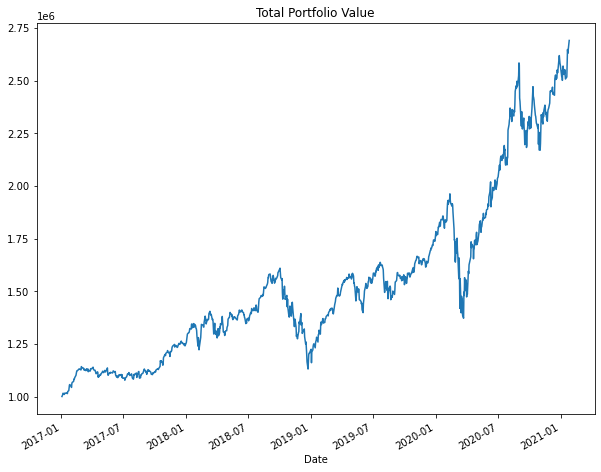

In [12]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

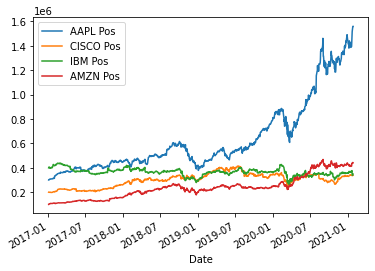

In [13]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

# Portfolio Statistics

key statistics for a profolio:

- daily returns

- overall cumulative returns: the amount returned after an entire time period.

- avg. daily return

- std. daily return: volatility of that actual return.




In [14]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2021-01-20,1.440276e+06,339768.347605,372686.774593,432998.521476,2.585730e+06
2021-01-21,1.493074e+06,338044.779803,377184.893218,438784.887978,2.647089e+06
2021-01-22,1.517074e+06,335496.890750,339824.553657,436826.469824,2.629222e+06
2021-01-25,1.559072e+06,337445.263044,339738.605409,437061.323217,2.673317e+06
2021-01-26,1.559081e+06,339356.186980,349224.804507,442472.507373,2.690134e+06


### Daily Returns

In [15]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)  # pct_change表示当前元素与先前元素的相差百分比

### Cumulative Return

In [16]:
# Keep in mind this is not the daily cumulative returns to just the overall cumulative return.
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )  # 只需要最后一行和第一行的就可以
print('Our return {} was percent!'.format(cum_ret))

Our return 169.01344251468183 was percent!


### Avg Daily Return

In [17]:
portfolio_val['Daily Return'].mean()

0.0010935821988731116

### Std Daily Return

In [18]:
portfolio_val['Daily Return'].std()

0.015781805649614258

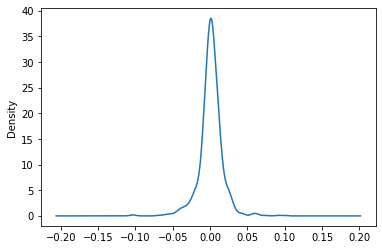

In [19]:
portfolio_val['Daily Return'].plot(kind='kde')  # 又是核密度图

# Sharpe Ratio

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). 

so, after approximation, the formula:

Sharpe ratio = Mean portfolio return/std deviation of portfolio return

If you are in a different country with higher rates for your trading currency, you can use this formula to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).


Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

In [20]:
# Sharpe Ratio
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR  # 不太行，应当调整一下比例

0.06929385794963462

In [21]:
# Annualized Sharpe Ratio
ASR = (252**0.5)*SR
ASR  

1.100005893113816